# MULTI VARIABLE LINEAR REGRESSION

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression as LR
import math
from word2number import w2n
import joblib

In [22]:
df = pd.read_csv("./data/hiring-MVRL-data.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
# STEP 1: FIXING THE HEADERS 
# df.columns.tolist()
df.rename(columns={"test_score(out of 10)" : "test_score", "interview_score(out of 10)" : "interview_score", "salary($)" : "salary"}, inplace=True)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [24]:
# STEP 2: Fixing the missing values outliers 
test_score_median = math.floor(df.test_score.median())
df["test_score"] = df.test_score.fillna(test_score_median)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [25]:
# STEP 3: Fixing missing values for Exp
# Assume 1: when no exp it is 0
# Assume 2: forgot 

df["experience"] = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [26]:
# e, t, i => salary 
# feature_varibles = e, t, i
# prediction = salary 

%matplotlib inline
plt.xlabel("exp")
plt.ylabel("salary")
plt.scatter(df["experience"], df["salary"])

In [46]:

%matplotlib inline
plt.xlabel("test score")
plt.ylabel("salary")
plt.scatter(df["test_score"], df["salary"])

In [28]:
%matplotlib inline
plt.xlabel("interview score")
plt.ylabel("salary")
plt.scatter(df["interview_score"], df["salary"])

In [29]:
df["experience"] = df["experience"].apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [30]:
reg_model = LR()
reg_model.fit(df[["experience", "test_score", "interview_score"]], df["salary"])

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
df = pd.read_csv("./data/hiring-MVRL-predict.csv")
df

,exp,test score,interview score
0,one,2.0,4.0
1,two,10.0,5.0
2,eleven,NaN,10.0
3,20,1.0,2.0
4,60,2.0,NaN


In [51]:
df.rename(columns={"exp" : "experience", "test score" : "test_score", "interview score" : "interview_score"}, inplace=True)
df

,experience,test_score,interview_score
0,one,2.0,4.0
1,two,10.0,5.0
2,eleven,NaN,10.0
3,20,1.0,2.0
4,60,2.0,NaN


In [53]:
test_median = df.test_score.median()
interview_median = df.interview_score.median()
df["test_score"] =  df["test_score"].fillna(test_median)
df["interview_score"] = df["interview_score"].fillna(interview_median)
df

,experience,test_score,interview_score
0,one,2.0,4.0
1,two,10.0,5.0
2,eleven,2.0,10.0
3,20,1.0,2.0
4,60,2.0,4.5


In [55]:
df["experience"] = df["experience"].apply(w2n.word_to_num)
df

,experience,test_score,interview_score
0,1,2.0,4.0
1,2,10.0,5.0
2,11,2.0,10.0
3,20,1.0,2.0
4,60,2.0,4.5


In [60]:
salary_pred = reg_model.predict(df[["experience", "test_score", "interview_score"]])
df["salary"] = salary_pred
df["salary"] = df["salary"].apply(int)
df

,experience,test_score,interview_score,salary
0,1,2.0,4.0,33062
1,2,10.0,5.0,52846
2,11,2.0,10.0,74423
3,20,1.0,2.0,80252
4,60,2.0,4.5,200129


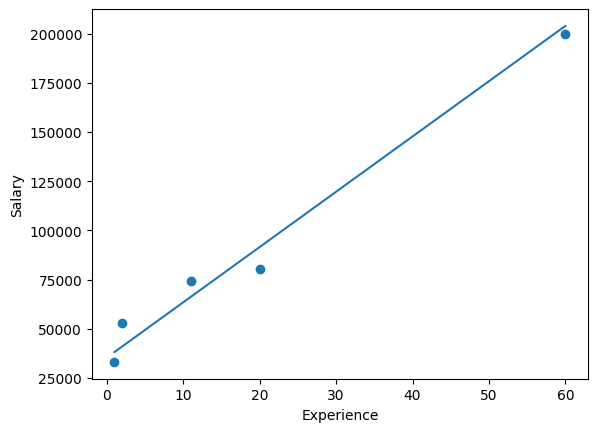

In [78]:
# Recommnad plot line for multi varibale regression
# take mean values of each features and convert it into one dataframe 

X_vis = pd.DataFrame({
    'experience': df['experience'],
    'test_score': np.mean(df['test_score']),
    'interview_score': np.mean(df['interview_score'])
})

plt.scatter(df['experience'], df['salary'])
plt.plot(df['experience'], reg_model.predict(X_vis))

plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()


In [63]:
df.to_csv("./data/output/iring-MVRL-output.csv")

In [66]:
joblib.dump(reg_model, "./saved_models/multiRegModel.joblib")

['./saved_models/multiRegModel.joblib']

In [67]:
# What we leant today 
# 1. How to create a regression model 
# 2. How to tarin the model using some accurate data set 
# 3. How to use the model to predict new outcomes 
# 4. save the outcome into a new CSV
# 5. How to save the model itself for futue usage 